<a href="https://colab.research.google.com/github/pabloderen/BIMnferer/blob/master/Pipe_Analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import json
import urllib

We download from de API in Flasgger (http://3.14.88.102:5000/apidocs/) the Pipe list item and it´s parameters


In [3]:
jsonfile = urllib.request.urlopen("http://3.14.88.102:5000/api/1/elements/pipes/?limit=6000").read().decode()
j=json.loads(jsonfile)

Then we make a Data Frame with the json file

In [4]:
df= pd.json_normalize(j)
df.head(3)

,projectId,Category,modelId,_id.$oid,properties_Dimensions_Length,properties_Dimensions_Size,properties_Mechanical_Material,properties_Mechanical_System Classification
0,b.c94f85e5-88fb-402c-bc60-72622f5f85b6,Pipes,d4ea3308-4b3f-d382-cacb-9791f772042b,5eee8651cb573f2fc2216a82,NaN,NaN,NaN,NaN
1,b.c94f85e5-88fb-402c-bc60-72622f5f85b6,Pipes,d4ea3308-4b3f-d382-cacb-9791f772042b,5eee8651cb573f2fc2216a83,NaN,NaN,NaN,NaN
2,b.c94f85e5-88fb-402c-bc60-72622f5f85b6,Pipes,d4ea3308-4b3f-d382-cacb-9791f772042b,5eee8651cb573f2fc2216a84,0.398 ft,"2 1/2""",Copper,Sanitary


We will drop the columns that have unuseful information for our case,
like "projectId", "modelId" and "_id.$oid"

In [5]:
values=["_id.$oid","modelId","projectId"]
df.drop(values, axis=1,inplace=True)

we can see how many different materials we have, so then we will 
group by PVC, Copper and Steel

In [6]:
df["properties_Mechanical_Material"].unique()

array([nan, 'Copper', 'Steel, Carbon', '<By Category>',
       'Polyvinyl Chloride - Rigid', 'CP_PI - Copper - ASTM B88 H.D.',
       'CP_PI - Steel - ASTM A53-B', 'CP_PI - PVC', 'Cast Iron',
       'Black Steel', 'Carbon Steel', 'Ductile Iron',
       'Polyvinyl Chloride, Rigid', 'Carbon Steel - ASTM A53 B'],
      dtype=object)

To make such a grouping, we define a function that search in the "properties_Mechanical_Material" and change each row that has another different name for the same material

In [47]:
def search(data):
   
    if "A53" in data.upper():
        return "Carbon Steel - ASTM A53 B"
    if "CATEGORY" in data.upper():
        return "NaN"
    if "POLYVINYL" in data.upper():
        return "PVC"
    if "PVC" in data.upper():
        return "PVC"
    if "NAN" in data.upper():
        return "NaN"
    else:
        return data

For practical purpuses, we will make a copy of the DataFrame, 
then apply the function in each row of the "properties_Mechanical_Material" column.

In [48]:
df2=df
df2["properties_Mechanical_Material"]=df2["properties_Mechanical_Material"].apply(lambda x: search(str(x)))


here is the amount of each material kind

In [49]:

df2["properties_Mechanical_Material"].value_counts()


PVC                               1745
Carbon Steel - ASTM A53 B         1322
Carbon Steel                      1237
Copper                            1102
CP_PI - Copper - ASTM B88 H.D.     424
Steel, Carbon                      121
NaN                                 41
Black Steel                          4
Ductile Iron                         2
Cast Iron                            2
Name: properties_Mechanical_Material, dtype: int64

Here we can see a graphic of the different amount of each materials:

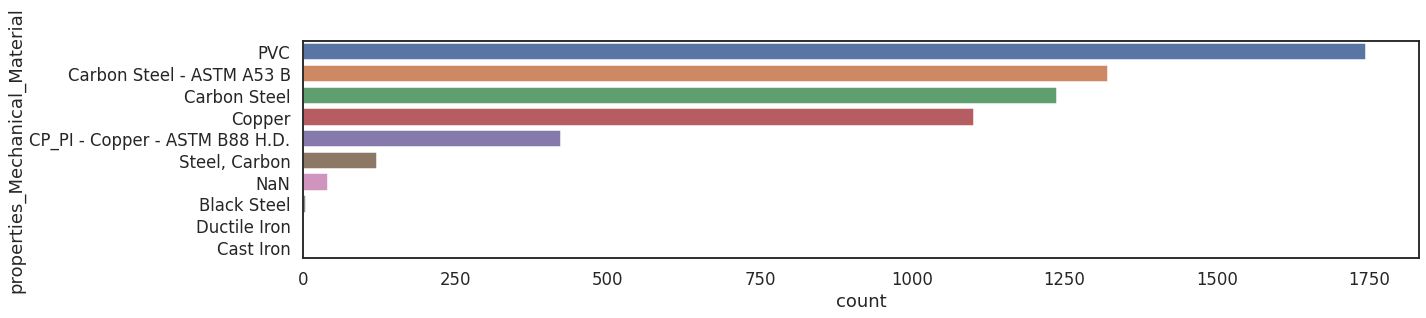

In [54]:
plt.figure(figsize=(20,4))
sns.countplot(y="properties_Mechanical_Material",data=df2,order=df2["properties_Mechanical_Material"].value_counts().index)

In [ ]:
df2["properties_Mechanical_System Classification"].value_counts()

Sanitary               1499
Hydronic Supply        1496
Hydronic Return        1209
Domestic Cold Water     716
Vent                    417
Domestic Hot Water      321
Other                   187
Fire Protection Dry     116
Fire Protection Wet       2
Name: properties_Mechanical_System Classification, dtype: int64

We drop the rows with properties_Dimensions_Length NaN values.

In [ ]:
df3=df2.dropna(axis=0,subset=["properties_Dimensions_Length"])


Her we start to convert the properties_Dimensions_Length from string to float 
(we use x.replace(" ft","") and x.replace("  ft",""), notice the spaces in each case)



In [ ]:
df3["properties_Dimensions_Length"]= df3["properties_Dimensions_Length"].apply(lambda x: x.replace(" ft",""))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3["properties_Dimensions_Length"]= df3["properties_Dimensions_Length"].apply(lambda x: float(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


we are analazing pipes, so we know that the dimensions Sizes are the diameter sizes. Then we can see that because a Size has the diameter simbol, creates another dimension. So we will take of the diameter simbol of all the column.

In [1]:
df3["properties_Dimensions_Size"].value_counts().head(5)

NameError: ignored

In [ ]:
df3["properties_Dimensions_Size"]= df3["properties_Dimensions_Size"].apply(lambda x: x.replace("ø",""))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Here we eliminate any leading and trailing whitespaces

In [ ]:
df3["properties_Dimensions_Size"]= df3["properties_Dimensions_Size"].apply(lambda x: x.strip())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3["properties_Dimensions_Size"].value_counts()

4"        1070
2"         835
3/4"       727
6"         636
3"         592
1"         580
2 1/2"     316
1 1/4"     257
1/2"       241
1 1/2"     235
16"        146
14"         96
8"          84
12"         64
10"         60
5"          22
1 3/8"       2
Name: properties_Dimensions_Size, dtype: int64

The "properties_Mechanical_System Classification" are 9 different types.

In [ ]:
lista=df3["properties_Mechanical_System Classification"].unique()

Set a number designator to all properties_Mechanical_System Classification

In [ ]:
dicc={}
i=0
for i in range(0,9):
  dicc[lista[i]]=i

we create a column with this designation

In [ ]:
df3["Number_Classification"]=df3["properties_Mechanical_System Classification"].apply(lambda x: dicc[x])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Then we get the dummies properties_Dimensions_Size and properties_Mechanical_Material

In [ ]:
df3["properties_Dimensions_Size"].nunique()

17

In [ ]:
material= pd.get_dummies(df3['properties_Mechanical_Material'])


In [ ]:
Dimensions_Size= pd.get_dummies(df3["properties_Dimensions_Size"])


In [ ]:
df4 = pd.concat([df3,material,Dimensions_Size],axis=1)

We eliminate some columns that we will not use (also can been seen the "properties Dimensions Length", just to try)

In [ ]:
droplist=["Category","NaN","properties_Mechanical_System Classification","properties_Mechanical_Material","properties_Dimensions_Size","properties_Dimensions_Length"]
df5=df4.drop(droplist, axis=1)

In [ ]:
df5.head()

,Number_Classification,Black Steel,CP_PI - Copper - ASTM B88 H.D.,Carbon Steel,Carbon Steel - ASTM A53 B,Cast Iron,Copper,Ductile Iron,PVC,"Steel, Carbon","1 1/2""","1 1/4""","1 3/8""","1""","1/2""","10""","12""","14""","16""","2 1/2""","2""","3""","3/4""","4""","5""","6""","8"""
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Here we define the size of our test size.

In [ ]:

from sklearn.model_selection import train_test_split
X = df5.drop('Number_Classification',axis=1)
y = df5['Number_Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.95, random_state=101)

here we train our Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85      1420
           1       0.00      0.00      0.00       182
           2       0.49      0.54      0.51       682
           3       0.85      0.07      0.13       390
           4       0.50      0.66      0.57       304
           5       0.59      0.58      0.58      1433
           6       0.54      0.52      0.53      1138
           7       0.00      0.00      0.00         2
           8       1.00      1.00      1.00       114

    accuracy                           0.62      5665
   macro avg       0.52      0.48      0.46      5665
weighted avg       0.61      0.62      0.59      5665



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(y_test,predictions))

[[1400    0    6    5    0    7    2    0    0]
 [  24    0  112    0    0   32   14    0    0]
 [  43    0  369    0  201   67    2    0    0]
 [ 359    0    3   28    0    0    0    0    0]
 [   1    0   75    0  202   26    0    0    0]
 [   8    0  106    0    0  829  490    0    0]
 [  21    0   85    0    0  444  588    0    0]
 [   0    0    0    0    0    2    0    0    0]
 [   0    0    0    0    0    0    0    0  114]]


In [ ]:
dicc

{'Domestic Cold Water': 2,
 'Domestic Hot Water': 4,
 'Fire Protection Dry': 8,
 'Fire Protection Wet': 7,
 'Hydronic Return': 6,
 'Hydronic Supply': 5,
 'Other': 1,
 'Sanitary': 0,
 'Vent': 3}